In this tutorial, we are going to see how to test for an association between two continuous variables in R. As we saw in the lectures, we can address this by running an association test using Pearson's correlations. In R, this can be accomplished with the `cor.test` function.

Let's first generate some fake data for this tutorial:

In [1]:
set.seed(1234)
x<-rnorm(50)
y<- 0.1*x + rnorm(50, sd = 1e-1)
z<-rnorm(50)

dat.tutorial<-data.frame(x,y,z)
head(dat.tutorial)

,x,y,z
,<dbl>,<dbl>,<dbl>
1,-1.2070657,-0.301309701,0.41452353
2,0.2774292,-0.030464668,-0.47471847
3,1.0844412,-0.002444845,0.06599349
4,-2.3456977,-0.336065971,-0.50247778
5,0.4291247,0.026681517,-0.82599859
6,0.5060559,0.106911171,0.16698928


Now, before performing any correlation test, it is always recommended to visualize the relationship between the two variables using a scatterplot. As usual, we can use **ggplot** for this task:

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


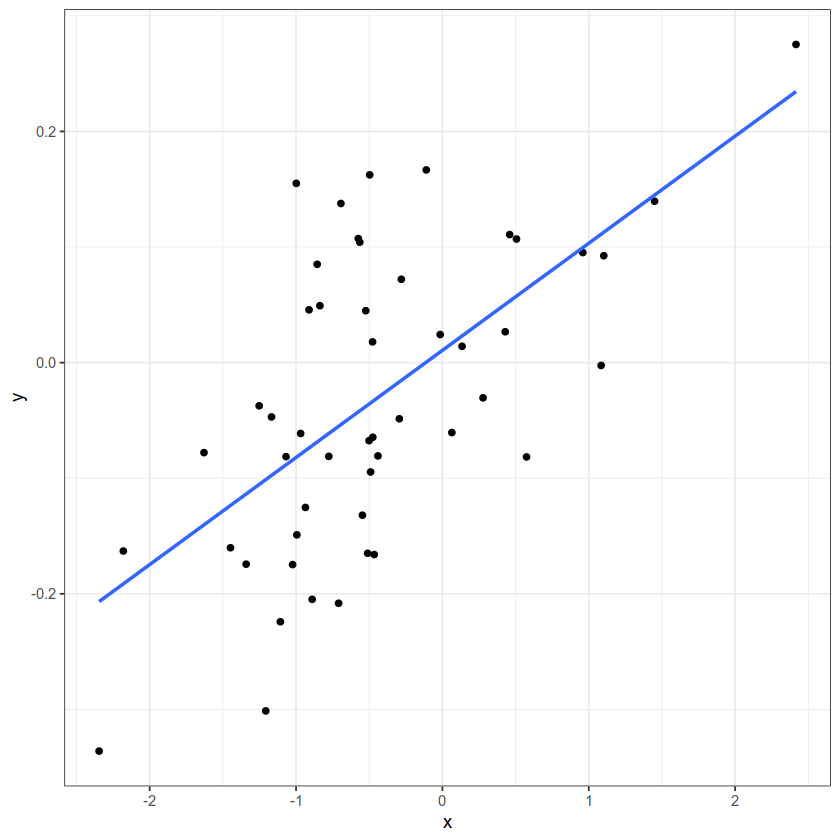

`geom_smooth()` using formula = 'y ~ x'


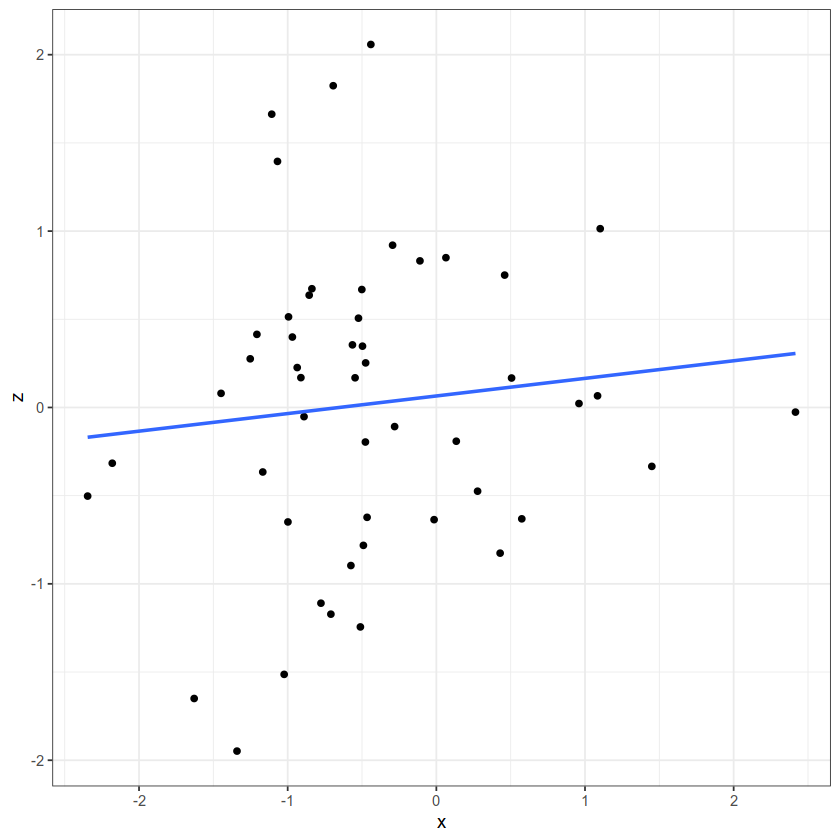

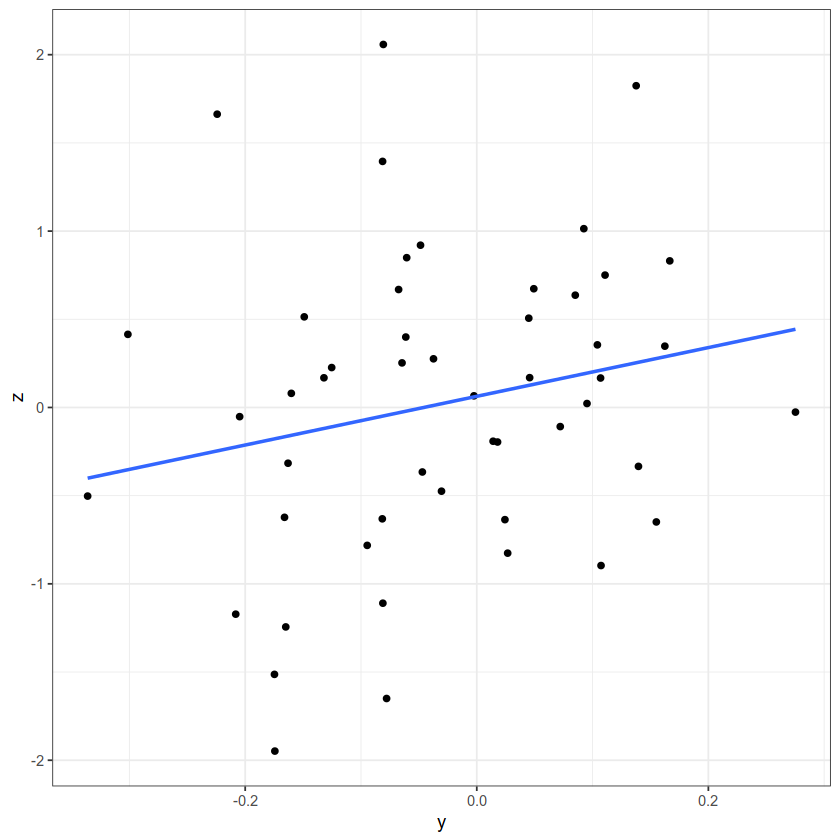

In [2]:
library(tidyverse)

ggplot(data=dat.tutorial, mapping=aes(x,y)) + 
geom_point() + 
geom_smooth(method = "lm",  se = FALSE) + 
theme_bw()

ggplot(data=dat.tutorial, mapping=aes(x,z)) + 
geom_point() + 
geom_smooth(method = "lm",  se = FALSE) + 
theme_bw()

ggplot(data=dat.tutorial, mapping=aes(y,z)) + 
geom_point() + 
geom_smooth(method = "lm",  se = FALSE) + 
theme_bw()

As we can see, it seems that the strongest correlation occurs between the variables "x" and "y". But is this correlation significant if we adopt, for example, the usual Type I error rate of $\alpha=0.05$?"

Let's address this using the `cor.test` function:

In [3]:
res.xy<-cor.test(x, y)
res.xy


	Pearson's product-moment correlation

data:  x and y
t = 5.4891, df = 48, p-value = 1.497e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4142598 0.7668035
sample estimates:
     cor 
0.621001 


As you can see, running this test is very simple as we just need to use as arguments in this function the variables whose association we want to test.

Alternatively, you can achieve the same result using the formulas syntax as follows (Note how the formula needs to be used in this case):

In [4]:
res.xy<-cor.test(formula = ~ x + y, data = dat.tutorial)
res.xy


	Pearson's product-moment correlation

data:  x and y
t = 5.4891, df = 48, p-value = 1.497e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4142598 0.7668035
sample estimates:
     cor 
0.621001 


As usual, whenever we run a statistical test and save its outputs to a variable, this will store a bunch of important results:

In [5]:
names(res.xy)

[1] "statistic"   "parameter"   "p.value"     "estimate"    "null.value" 
[6] "alternative" "method"      "data.name"   "conf.int"

In particular, here the "estimate" refers to the observed Pearson correlation *r*, and "statistic" the t-statistic built to generate our p-value, as we saw in the lectures.

In [6]:
# This is the Pearson correlation
res.xy$estimate

# This is the t-statistic
res.xy$statistic

cor 
0.621001

t 
5.489114

As we can see, assuming $\alpha=0.05$, we can indeed reject the null hypothesis that there is no association between "x" and "y". 

In the above example, keep in mind that by default, `cor.test` uses $r\neq 0$ as the alternative hypothesis, but we can change this to test either side of the correlation (r>0 or r<0) by setting the argument *alternative* in `cor.test`:

In [7]:
# Here the alternative hypothesis is that r > 0
cor.test(formula = ~ x + y, data = dat.tutorial, alternative = "greater")

# Here the alternative hypothesis is that r < 0
cor.test(formula = ~ x + y, data = dat.tutorial, alternative = "less")


	Pearson's product-moment correlation

data:  x and y
t = 5.4891, df = 48, p-value = 7.484e-07
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.4515983 1.0000000
sample estimates:
     cor 
0.621001 



	Pearson's product-moment correlation

data:  x and y
t = 5.4891, df = 48, p-value = 1
alternative hypothesis: true correlation is less than 0
95 percent confidence interval:
 -1.0000000  0.7471884
sample estimates:
     cor 
0.621001 


Finally, for this particular dataset that we have created, we can also confirm that there is no significant statistical association between the other pairs of variables, as suggested by the scatterplots above:

In [8]:
# This tests the association between x and z
res.xz<-cor.test(dat.tutorial$x, dat.tutorial$z)
res.xz

# This tests the association between y and z
res.yz<-cor.test(formula = ~ y + z, data = dat.tutorial)
res.yz


	Pearson's product-moment correlation

data:  dat.tutorial$x and dat.tutorial$z
t = 0.71378, df = 48, p-value = 0.4788
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1810290  0.3702683
sample estimates:
      cor 
0.1024828 



	Pearson's product-moment correlation

data:  y and z
t = 1.5008, df = 48, p-value = 0.14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.07080536  0.46279026
sample estimates:
      cor 
0.2117149 
